# Credit score prediction for credit card issuance
**Aims**:
1. > Create a model that can provide an indication of whether or not to approve the credit card application for a given customer;
2. > If a customer is denied a credit card, provide a reason (the model must provide easily interpretable indications).

**Note**:
- > A target variable is missing, we don't want to give you any indications, it's up to you to understand how to proceed.

## Imports

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

## Dataframe preparation
1. Load csvs in pandas dfs;
2. Duplicates removal in application_record;
3. **inner join** dfs;
4. Drop ID col (info not useful for the model).

In [ ]:
# 1.
application_record_df = pd.read_csv('application_record.csv')

In [ ]:
# 2
application_record_df.shape

(438557, 18)

In [ ]:
# 2
application_record_df = application_record_df.drop_duplicates(subset='ID')
application_record_df.shape

(438510, 18)

In [ ]:
# 1.
credit_record_df = pd.read_csv('credit_record.csv')

In [ ]:
# 3.
merged_df = pd.merge(application_record_df, credit_record_df, on='ID')

In [ ]:
# 4.
merged_df = merged_df.drop('ID', axis=1)

## EDA

### Head of `merged_df`

In [ ]:
merged_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


### Shape of `merged_df`

In [ ]:
merged_df.shape

(777715, 19)

`merged_df` has 777.715 rows and 19 cols.

### Value counts per class feature of categorical variables of `merged_df` and their dtypes

In [ ]:
merged_df.CODE_GENDER.value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [ ]:
merged_df.FLAG_OWN_CAR.value_counts()

N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
merged_df.FLAG_OWN_REALTY.value_counts()

Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
merged_df.NAME_INCOME_TYPE.value_counts()

Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
merged_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    524261
Higher education                 213633
Incomplete higher                 30329
Lower secondary                    8655
Academic degree                     837
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
merged_df.NAME_FAMILY_STATUS.value_counts()

Married                 546619
Single / not married     94335
Civil marriage           60342
Separated                45255
Widow                    31164
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
merged_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      697151
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
merged_df.FLAG_MOBIL.value_counts()

1    777715
Name: FLAG_MOBIL, dtype: int64

I'm going to remove `FLAG_MOBIL` cause everyone has a mobile phone, so it's not a useful info for the model.

In [ ]:
merged_df = merged_df.drop('FLAG_MOBIL', axis=1)

In [ ]:
# check col removal
merged_df.shape

(777715, 18)

In [ ]:
merged_df.FLAG_WORK_PHONE.value_counts()

0    597427
1    180288
Name: FLAG_WORK_PHONE, dtype: int64

In [ ]:
merged_df.FLAG_PHONE.value_counts()

0    543650
1    234065
Name: FLAG_PHONE, dtype: int64

In [ ]:
merged_df.FLAG_EMAIL.value_counts()

0    706418
1     71297
Name: FLAG_EMAIL, dtype: int64

In [ ]:
merged_df.OCCUPATION_TYPE.value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
merged_df.STATUS.value_counts()

C    274364
0    243034
X    122423
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

### Statiscal measures of numerical variables of `merged_df`

In [ ]:
merged_df['CNT_CHILDREN'].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

It's a bit strange to have 19 children, but due to the fact that 75% of data are equal or under 1, I try to continue with this kind of data. It is quite not plausible, but not impossible too.

In [ ]:
amt_income_total_describe = merged_df['AMT_INCOME_TOTAL'].describe()
amt_income_total_describe = amt_income_total_describe.apply(lambda x: round(x, 2))
print(amt_income_total_describe)

count     777715.00
mean      188534.80
std       101622.45
min        27000.00
25%       121500.00
50%       162000.00
75%       225000.00
max      1575000.00
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
merged_df['DAYS_BIRTH'].describe()

count    777715.000000
mean     -16124.937046
std        4104.304018
min      -25152.000000
25%      -19453.000000
50%      -15760.000000
75%      -12716.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
merged_df['DAYS_EMPLOYED'].describe()

count    777715.000000
mean      57775.825016
std      136471.735391
min      -15713.000000
25%       -3292.000000
50%       -1682.000000
75%        -431.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

It is impossible that a human being has been unemployed for 1.000 years (max of DAYS_EMPLOYED/365), so I'll remove all rows containing plus than 54.750 (that is 150 years, the biological limit as per [this study](https://cordis.europa.eu/article/id/430191-trending-science-how-long-can-we-live/it)).

In [ ]:
biological_limit = 54750
merged_df = merged_df[merged_df['DAYS_EMPLOYED'] <= biological_limit]

In [ ]:
merged_df.shape

(649743, 18)

In [ ]:
merged_df['CNT_FAM_MEMBERS'].describe()

count    649743.000000
mean          2.300887
std           0.936233
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

It's a bit strange to have 20 members in a family, but due to the fact that 75% of data are equal or under 3, I try to continue with this kind of data. It is quite not plausible, but not impossible too.

In [ ]:
merged_df['MONTHS_BALANCE'].describe()

count    649743.000000
mean        -19.343351
std          14.055767
min         -60.000000
25%         -29.000000
50%         -17.000000
75%          -8.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

### Count of missing values per feature of `merged_df`

In [ ]:
missing_values_count = merged_df.isnull().sum()
missing_values_count

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        112076
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

I'll drop all rows where OCCUPATION_TYPE is NaN, cause can't be Pensioner (if was, INCOME_TYPE would have been Pensioner and not Working)

In [ ]:
merged_df = merged_df.dropna(subset=['OCCUPATION_TYPE'])

In [ ]:
merged_df.shape

(537667, 18)

In [ ]:
merged_df.columns.tolist()

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'STATUS']

## Feature engineering
1. Encoding:
 - binary encoding for:
    - `FLAG_OWN_CAR`
    - `FLAG_OWN_REALTY`
  - OHE for:
    - `CODE_GENDER`
    - `NAME_INCOME_TYPE`
    - `NAME_FAMILY_STATUS`
    - `NAME_HOUSING_TYPE`
    - `OCCUPATION_TYPE`
  - ordinal encoding for:
    - `NAME_EDUCATION_TYPE`
2. Feature extraction (age from `DAYS_BIRTH`);
3. Define labels;
4. Normalization of numeric features with MinMaxScaler.



### 1. Encoding

#### Binary encoding

In [ ]:
# FLAG_OWN_CAR
own_car_mapping = {'N': 0, 'Y': 1}
merged_df['FLAG_OWN_CAR'] = merged_df['FLAG_OWN_CAR'].map(own_car_mapping)

In [ ]:
# FLAG_OWN_REALTY
own_realty_mapping = {'N': 0, 'Y': 1}
merged_df['FLAG_OWN_REALTY'] = merged_df['FLAG_OWN_REALTY'].map(own_realty_mapping)

#### OHE

In [ ]:
merged_df = pd.get_dummies(merged_df, columns=['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [ ]:
merged_df.shape

(537667, 49)

#### Ordinal Encoding

In [ ]:
# NAME_EDUCATION_TYPE

custom_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5 # supposition
}

encoder = LabelEncoder()

merged_df['NAME_EDUCATION_TYPE'] = encoder.fit_transform(merged_df['NAME_EDUCATION_TYPE'].map(custom_mapping))

In [ ]:
merged_df.shape

(537667, 49)

### 2. Feature extraction

In [ ]:
merged_df['DAYS_BIRTH'] = round(abs(merged_df['DAYS_BIRTH'])/365)

In [ ]:
merged_df['DAYS_BIRTH'].min()

21.0

In [ ]:
merged_df['DAYS_BIRTH'].max()

67.0

### 3. Define labels

In [ ]:
mapping = {0: 0,
           1: 0,
           2: 0,
           3: 0,
           4: 0,
           5: 0,
           'X': 1,
           'C': 1}

merged_df['STATUS'] = merged_df['STATUS'].replace(mapping)

In [ ]:
merged_df.rename(columns={'STATUS': 'RELIABILITY'}, inplace=True)

In [ ]:
merged_df.shape

(537667, 49)

In [ ]:
merged_df.columns.tolist()

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_EDUCATION_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'RELIABILITY',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'OCCUPATION_TYPE_Accountants',
 'OCCUPATION_TYPE_Cleaning staff',
 'OCCUPATION_TYPE_Cooking staff',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Dri

### 4. Normalization of numeric features with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
numeric_cols = ['CNT_CHILDREN',
                'AMT_INCOME_TOTAL',
                'DAYS_BIRTH',
                'DAYS_EMPLOYED',
                'CNT_FAM_MEMBERS',
                'MONTHS_BALANCE']

merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = merged_df.drop("RELIABILITY",axis = 1).values
y = merged_df["RELIABILITY"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [ ]:
len(X_train), len(X_test)

(376366, 161301)

## Random Forest

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 59.9 s, sys: 326 ms, total: 1min
Wall time: 1min 2s


RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.705085523338355

### Feature contribution

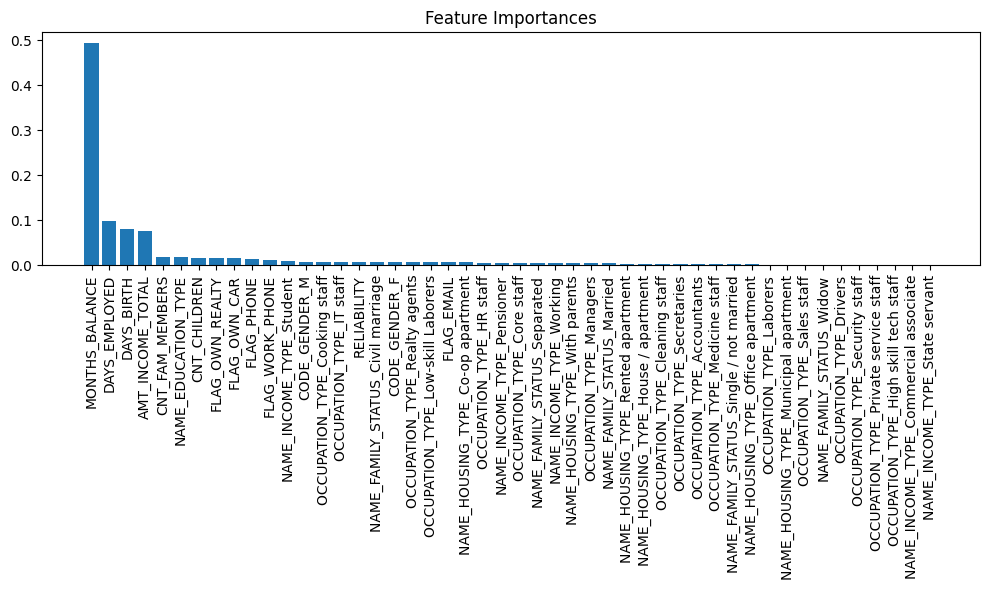

In [ ]:
feature_names = merged_df.columns.to_numpy()

importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

`MONTHS_BALANCE` seems to be the most important feature to determine whether or not a person is reliable.

It is not cristal clear the meaning of this feature, so it is recommended to contact subject experts to have further information about it.

Other features that have a significant impact are:
- `DAYS_EMPLOYED`
- `DAYS_BIRTH`
- `AMT_INCOME_TOTAL`
and are all reasonable.